In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Books.csv').drop(columns=['Image-URL-S',
                                             'Image-URL-M',
                                             'Image-URL-L'])\
        .merge(pd.read_csv('Ratings.csv'),
               on='ISBN')

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_23404\2329617274.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Books.csv').drop(columns=['Image-URL-S',


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


# Data Cleaning

## Membersihkan data Null

In [3]:
df.dropna(inplace=True)

## Mengambil hanya beberapa sampel data

In [4]:
df = df.loc[:25000]

# Data Understanding

## Melihat kondisi data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25001 entries, 0 to 25000
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 25001 non-null  object
 1   Book-Title           25001 non-null  object
 2   Book-Author          25001 non-null  object
 3   Year-Of-Publication  25001 non-null  object
 4   Publisher            25001 non-null  object
 5   User-ID              25001 non-null  int64 
 6   Book-Rating          25001 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


## Melihat berapa banyak buku, penulis dan penerbit

In [6]:
for i in ['Book-Title', 'Book-Author', 'Publisher']:

    print(f'{i} :  {len(df[i].unique())}')

Book-Title :  406
Book-Author :  334
Publisher :  214


## Univariative Data Analysis

       Book-Author  Count
0     Rich Shapero   2502
1     John Grisham   1572
2        Dan Brown   1108
3     Alice Sebold    817
4  James Patterson    735
          Publisher  Count
0           Too Far   2502
1  Ballantine Books   1918
2     Little, Brown   1579
3            Pocket   1439
4         Perennial   1152


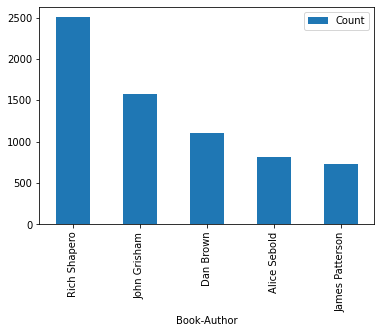

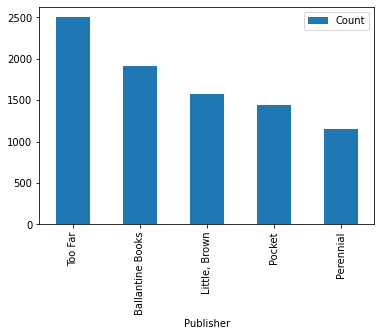

In [7]:
for i in ['Book-Author', 'Publisher']:

    data = df[i].value_counts()
    data = pd.DataFrame({i:data.index,
                         'Count':data.values})
    print(data.head(5))
    data.head(5).plot.bar(x=i,
                          y='Count')

## Multivariative Data Analysis

                     Book-Rating
Book-Author                     
Raymond Chandler            10.0
Sandra Levy Ceren           10.0
Joanna Trollope             10.0
Charles Noland              10.0
Jose Ortega Y Gaset          8.0
                                    Book-Rating
Publisher                                      
1stBooks Library                           10.0
Ullstein Tb                                10.0
Andrew Scott Publishers                    10.0
Deutscher Taschenbuch Verlag (DTV)          9.5
William Morrow                              9.5


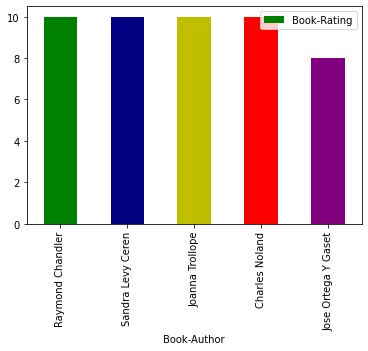

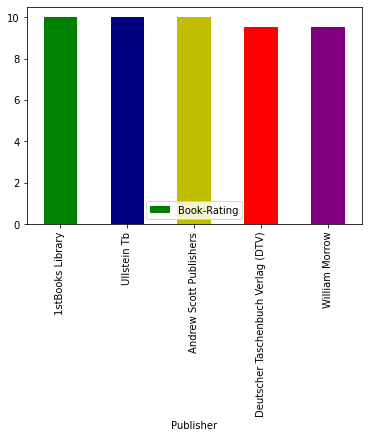

In [8]:
for i in ['Book-Author', 'Publisher']:

    data = df.groupby(i).agg({'Book-Rating':'mean'})
    print(data.sort_values(by='Book-Rating', ascending=False)\
              .head(5))
    data.sort_values(by='Book-Rating', ascending=False)\
        .head(5)\
        .plot.bar(y='Book-Rating',
                  color=['g', 'navy', 'y', 'r', 'purple'])

# Data Preparation (Content-Based)

## Membuat vectorizer tf-idf dari variabel yang dipilih

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vector = TfidfVectorizer()

vector.fit(df['Book-Author'])
vector.get_feature_names_out()

array(['abraham', 'abrahams', 'adam', 'adams', 'adler', 'al', 'alan',
       'albom', 'alcott', 'aleksandr', 'alexander', 'alice', 'allen',
       'allende', 'amp', 'amy', 'anderson', 'andrea', 'anita', 'ann',
       'anna', 'anne', 'ansay', 'anthony', 'antoine', 'arabella',
       'armstrong', 'arthur', 'arundhati', 'ashley', 'austen', 'auster',
       'bach', 'baldacci', 'barbara', 'barber', 'bari', 'barker',
       'barnard', 'barr', 'barrett', 'barrie', 'barry', 'beale',
       'beattie', 'belva', 'ben', 'benjamin', 'berendt', 'bernard',
       'bernie', 'bernieres', 'betty', 'bill', 'binchy', 'blyton', 'bob',
       'boyle', 'bradbury', 'brady', 'brashares', 'braun', 'brian',
       'bridwell', 'brin', 'brooks', 'brown', 'bruce', 'byatt', 'cahill',
       'canfield', 'carcaterra', 'carl', 'carlo', 'carol', 'carroll',
       'cather', 'celia', 'ceren', 'chandler', 'chapman', 'charles',
       'charlotte', 'cheryl', 'chevalier', 'chopra', 'christopher',
       'chuck', 'clairday', '

## Membuat matriks tf-idf

In [11]:
tfidf_matrix = vector.fit_transform(df['Book-Author'])
tfidf_matrix.shape 

(25001, 545)

In [12]:
pd.DataFrame(tfidf_matrix.todense(), 
             columns=vector.get_feature_names_out(),
             index=df['Book-Title']).sample(22, axis=1)\
                                     .sample(10, axis=0)

,morrison,lopez,eleanor,salinger,heti,plunkett,schiller,ondaatje,holt,al,...,rich,heyer,kaufman,maron,wolfe,rousseau,fay,zimler,grahame,franken
Book-Title,,,,,,,,,,,,,,,,,,,,,
"The Ruby in the Smoke (Sally Lockhart Trilogy, Book 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Catcher in the Rye,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Only Love (Magical Love),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Tao of Pooh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Life of Pi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Pillars of the Earth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Street Lawyer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wicked: The Life and Times of the Wicked Witch of the West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preparation (Colaborative)

## Membuat encoder dan decoder untuk fitur 'User-ID' dan 'Book-Rating'

In [13]:
df_colab = df.copy()

user_ids = df_colab['User-ID'].unique().tolist()
user_encoded = {x: i for i, x in enumerate(user_ids)}
user_decoded = {i: x for i, x in enumerate(user_ids)}

isbn = df_colab['ISBN'].unique().tolist()
isbn_encoded = {x: i for i, x in enumerate(isbn)}
isbn_decoded = {i: x for i, x in enumerate(isbn)}

df_colab['User'] = df_colab['User-ID'].map(user_encoded)
df_colab['Book-ID'] = df_colab['ISBN'].map(isbn_encoded)

## Menormalisasi variabel target 'Book-Rating'

In [14]:
num_users = len(user_decoded)
num_books = len(isbn_decoded)

df['Book-Rating'] = df_colab['Book-Rating'].values.astype(np.float32)
min_rating = min(df_colab['Book-Rating'])
max_rating = max(df_colab['Book-Rating'])
 
print(f'Number of User: {num_users}, Number of Book: {num_books}, Min Rating: {min_rating} Max Rating: {max_rating}')
df_colab['Book-Rating'] = df_colab['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

Number of User: 12075, Number of Book: 409, Min Rating: 0 Max Rating: 10


## Mengacak dataframe sebanyak 42 kali

In [15]:
df_colab = df_colab.sample(frac=1, random_state=42)

## Memisahkan data menjadi data uji dan data latih

In [16]:
x = df_colab[['User', 'Book-ID']].values
y = df_colab['Book-Rating']
 
train_indices = int(0.8 * df_colab.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# Modeling (Content-Based)

## Membuat vektor cosine similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [19]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Book-Title'], columns=df['Book-Title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (25001, 25001)


Book-Title,The Joy Luck Club,Making Minty Malone,Midnight in the Garden of Good and Evil: A Savannah Story,The Secret Life of Bees,Crow Lake (Today Show Book Club #7)
Book-Title,,,,,
Little Altars Everywhere: A Novel,0.0,0.0,0.0,0.0,0.0
The Secret Life of Bees,0.0,0.0,0.0,1.0,0.0
Wild Animus,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,0.0,0.0,0.0
Babyhood,0.0,0.0,0.0,0.0,0.0
Girl with a Pearl Earring,0.0,0.0,0.0,0.0,0.0
The Curious Incident of the Dog in the Night-Time : A Novel,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,0.0,0.0,0.0
Secret History,0.0,0.0,0.0,0.0,0.0


# Inference (Content-Based)

## Membuat dan memanggil fungsi rekomendasi

In [20]:
def resto_recommendations(judul_buku, similarity_data=cosine_sim_df, items=df[['Book-Title', 'Book-Author']], k=5):

    index = similarity_data.loc[:,judul_buku]\
                           .to_numpy()\
                           .argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = np.unique(closest[closest != judul_buku])

    return pd.DataFrame({'Book-Title':closest}).merge(items, on='Book-Title')\
                                               .drop_duplicates()\
                                               .head(k)

In [21]:
resto_recommendations('Animal Farm')

C:\Users\User\AppData\Local\Temp\ipykernel_23404\2583346188.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  closest = similarity_data.columns[index[-1:-(k+2):-1]]


,Book-Title,Book-Author
0,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield
8,Clara Callan,Richard Bruce Wright
22,Classical Mythology,Mark P. O. Morford
23,Decision in Normandy,Carlo D'Este
26,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata


# Modeling (Colaborative)

## Membuat RecommenderNet dengan embedding layer dan sigmoid activation sebagai output

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_books, embedding_size, dropout_rate, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)

    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size

    self.user_embedding = tf.keras.layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.user_bias = tf.keras.layers.Embedding(num_users, 1) 

    self.books_embedding = tf.keras.layers.Embedding( 
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.books_bias = tf.keras.layers.Embedding(num_books, 1) 

    self.dropout = tf.keras.layers.Dropout(dropout_rate)
 
  def call(self, inputs):

    user_vector = self.user_embedding(inputs[:, 0])
    user_vector = self.dropout(user_vector)
    user_bias = self.user_bias(inputs[:, 0])

    books_vector = self.books_embedding(inputs[:, 1])
    books_vector = self.dropout(books_vector)
    books_bias = self.books_bias(inputs[:, 1])
 
    dot_user_resto = tf.tensordot(user_vector, books_vector, 2) 
 
    x = dot_user_resto + user_bias + books_bias
    
    return tf.nn.sigmoid(x) 


## Mengompile model

In [24]:
model = RecommenderNet(num_users, num_books, 50, 0.2)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Melatih model

In [25]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
2500/2500 [==============================] - 26s 10ms/step - loss: 0.6504 - root_mean_squared_error: 0.4140 - val_loss: 0.6145 - val_root_mean_squared_error: 0.3914
Epoch 2/100
2500/2500 [==============================] - 25s 10ms/step - loss: 0.5860 - root_mean_squared_error: 0.3774 - val_loss: 0.6020 - val_root_mean_squared_error: 0.3844
Epoch 3/100
2500/2500 [==============================] - 25s 10ms/step - loss: 0.5673 - root_mean_squared_error: 0.3666 - val_loss: 0.5972 - val_root_mean_squared_error: 0.3817
Epoch 4/100
2500/2500 [==============================] - 24s 10ms/step - loss: 0.5526 - root_mean_squared_error: 0.3580 - val_loss: 0.5939 - val_root_mean_squared_error: 0.3800
Epoch 5/100
2500/2500 [==============================] - 25s 10ms/step - loss: 0.5405 - root_mean_squared_error: 0.3507 - val_loss: 0.5901 - val_root_mean_squared_error: 0.3779
Epoch 6/100
2500/2500 [==============================] - 25s 10ms/step - loss: 0.5291 - root_mean_squared_error: 0.

# Evaluation

## Menilai performa model dengan grafik loss rmse

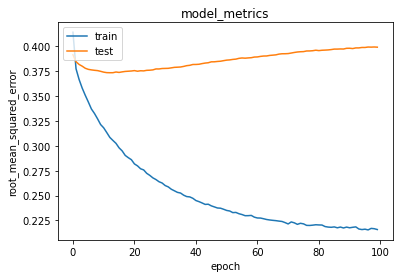

In [26]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Inference (Colaborative)

## Memberi rekomendasi berdasarkan buku yang belum dibaca

In [72]:
book_df = df[['ISBN', 'Book-Title', 'Book-Author']].rename(columns={'Book-Title':'Book_Title', 'Book-Author':'Book_Author'})
user_id = df_colab['User-ID'].sample(1).iloc[0]
book_read_by_user = df_colab[df_colab['User-ID'] == user_id]
 
book_not_read = book_df[~book_df['ISBN'].isin(book_read_by_user['Book-ID'].values)]['ISBN'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(isbn_encoded.keys()))
)
 
book_not_read = [[isbn_encoded.get(x)] for x in book_not_read]
user_encoder2 = user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder2]] * len(book_not_read), book_not_read)
)

In [81]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    isbn_decoded.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_resto_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['ISBN'].isin(top_resto_user)]
for row in book_df_rows.drop_duplicates().itertuples():
    print(row.Book_Title, ':', row.Book_Author)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.drop_duplicates().itertuples():
    print(row.Book_Title, ':', row.Book_Author)

13/13 [==============================] - 0s 1ms/step
Showing recommendations for users: 258152
Book with high ratings from user
--------------------------------
The Catcher in the Rye : J.D. Salinger
The Pillars of the Earth : Ken Follett
--------------------------------
Top 10 book recommendation
--------------------------------
The Adventures of Drew and Ellie: The Magical Dress : Charles Noland
If I Ever Get Back to Georgia, I'm Gonna Nail My Feet to the Ground : LEWIS GRIZZARD
Der KÃ?Â¶nig in Gelb. : Raymond Chandler
Die Mechanismen der Freude. ErzÃ?Â¤hlungen. : Ray Bradbury
Die Liebe in Den Zelten : Gabriel Garcia Marquez
Eine ganz normale AffÃ?Â¤re. : Joanna Trollope
The Golden Compass (His Dark Materials, Book 1) : PHILIP PULLMAN
The Subtle Knife (His Dark Materials, Book 2) : PHILIP PULLMAN
Martian Chronicles : Ray Bradbury
New Perspectives: Runes : Bernard King
